# Feature Selection 

In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

## Load Dataset 

In [58]:
df_x = pd.read_csv('x_train_data.csv', sep=',')
df_y = pd.read_csv('y_train_data.csv', sep=',')

In [59]:
df_x.shape

(72201, 9)

In [60]:
df_final = pd.concat([df_x, df_y], axis=1, join='inner')
df_final.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount,label
0,1.0,11.0,1,0,29,983,235000000,94178,961,0.0
1,6.0,12.0,2,511,15344,384,114000000,11954682,221383,1.0
2,10.0,15.0,1,1,30,821,243000000,78498,801,0.0
3,15.0,16.0,2,330,9919,98,622000000,2145912,32512,0.0
4,2.0,11.0,3,274,8223,287,579000000,90935340,87270,1.0


## Check Optimum Feature Size

In [61]:
svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step= 1, cv=StratifiedKFold(2), scoring='accuracy')

**Raw Dataset**

In [62]:
# df_sample =  df.sample(n=100)

# rfecv.fit(df_sample[df_sample.columns[:21]], df_sample['label'])
# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

**Selected Feature**

In [63]:
# df_sample =  df_final.sample(n=100)

# rfecv.fit(df_sample[df_sample.columns[:21]], df_sample['label'])
# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

## Feature Selection

### Heatmap 

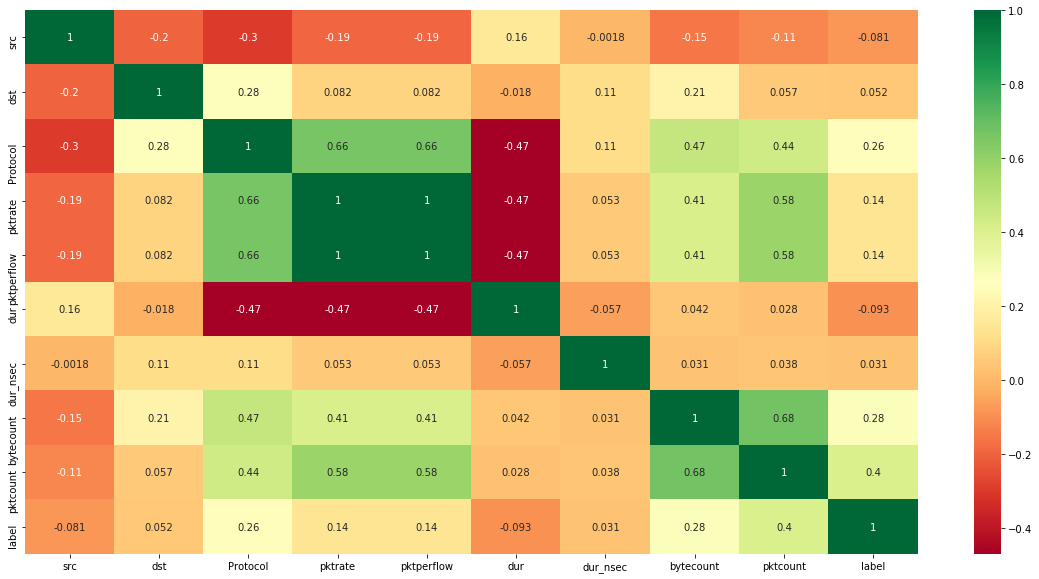

In [64]:
fig = plt.figure(figsize=(20,10))
corrMatrix = df_final.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

### Feature Selection Using Extra Tree Classifier

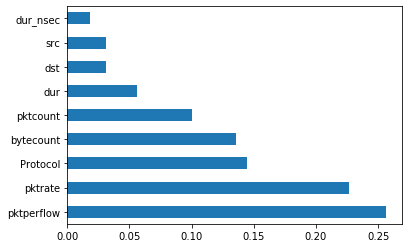

In [65]:
model= ExtraTreesClassifier() #model ini bisa dicari lagi alternatifnya mungkin ada metode lain butuh dasar paper
X = df_final[df_final.columns[:9]]
Y = df_final['label']
model.fit(X,Y)
importance = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
importance.nlargest(100).plot(kind='barh')
plt.show()

## Feature Selection Using Chi-Square Methods

In [66]:
X = df_final[df_final.columns[:9]]
Y = df_final['label']

#check best feature after k=9
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(9,'Score'))

      Feature         Score
7   bytecount  3.483034e+11
6    dur_nsec  1.193248e+10
8    pktcount  5.999966e+08
4  pktperflow  7.134901e+06
3     pktrate  2.392799e+05
5         dur  1.534759e+05
0         src  1.975648e+03
2    Protocol  1.760074e+03
1         dst  4.728430e+02


Dari sini kita bisa menguji untuk fitur bisa kita gunakan yang sudah ditentukan dari Heatmap, Extra Tree, atau menggunakan Chi-Square. 

Selain itu juga bisa dipertimbangkan untuk melakukan pengecekan irisannya dan terhadap dataset satu lagi bisa dilihat kemungkinan irisan ini ada di **dst, protocol, src, bytecount**

In [67]:
df_heatmap = df_final
df_feature_selection = df_final[['pktrate','pktperflow','Protocol', 'src','dst','label']].copy()
df_chi_square = df_final[['dst','src','Protocol','pktcount','pktcount','label']].copy()
df_slice = df_final[['dst','src','Protocol','bytecount','label']].copy()

## Check Final Dataset 

In [68]:
df_feature_selection.head(5)

,pktrate,pktperflow,Protocol,src,dst,label
0,0,29,1,1.0,11.0,0.0
1,511,15344,2,6.0,12.0,1.0
2,1,30,1,10.0,15.0,0.0
3,330,9919,2,15.0,16.0,0.0
4,274,8223,3,2.0,11.0,1.0


In [69]:
df_chi_square.head(5)

,dst,src,Protocol,pktcount,pktcount,label
0,11.0,1.0,1,961,961,0.0
1,12.0,6.0,2,221383,221383,1.0
2,15.0,10.0,1,801,801,0.0
3,16.0,15.0,2,32512,32512,0.0
4,11.0,2.0,3,87270,87270,1.0


In [70]:
df_slice.head(5)

,dst,src,Protocol,bytecount,label
0,11.0,1.0,1,94178,0.0
1,12.0,6.0,2,11954682,1.0
2,15.0,10.0,1,78498,0.0
3,16.0,15.0,2,2145912,0.0
4,11.0,2.0,3,90935340,1.0


In [71]:
df_heatmap.head(5)

,src,dst,Protocol,pktrate,pktperflow,dur,dur_nsec,bytecount,pktcount,label
0,1.0,11.0,1,0,29,983,235000000,94178,961,0.0
1,6.0,12.0,2,511,15344,384,114000000,11954682,221383,1.0
2,10.0,15.0,1,1,30,821,243000000,78498,801,0.0
3,15.0,16.0,2,330,9919,98,622000000,2145912,32512,0.0
4,2.0,11.0,3,274,8223,287,579000000,90935340,87270,1.0


## Save

In [72]:
df_heatmap.to_csv("processed_dataset_10.csv", sep=',', index=False)
df_feature_selection.to_csv("processed_dataset_5.csv", sep=',', index=False)
df_chi_square.to_csv("processed_dataset_chi_square.csv", sep=',', index=False)
df_slice.to_csv('processed_dataset_slice.csv', sep=',', index=False)